In [ ]:
#!pip uninstall tensorflow
#!pip install tensorflow==2.1.0

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

#%tensorflow_version 2.x
import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

tf.__version__

'2.2.0-rc3'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
gdrive = 'drive/My Drive/Colab Notebooks'
data_dir = pathlib.Path(gdrive + '/Datav7/')
image_count = len(list(data_dir.glob('*/*.png')))
image_count

1036

In [ ]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*')])
print(CLASS_NAMES)
classes_len = len(CLASS_NAMES)
print(classes_len)

['ID20.D2' 'ID24.D1' 'ID21.D2' 'ID22.D2' 'ID13.D2' 'ID14.D1' 'ID2.D2 (C)'
 'ID19.D1' 'ID11.D1' 'ID1.D1' 'ID9.D2' 'ID29.D1' 'ID33.D2' 'ID8.D2'
 'ID32.D2' 'ID7.D2' 'ID25.D1' 'ID5.D1' 'ID6.D2 (C)']
19


In [ ]:
print(data_dir)

drive/My Drive/Colab Notebooks/Datav7


In [ ]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [ ]:
BATCH_SIZE = 32
IMG_HEIGHT = 432
IMG_WIDTH = 288
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [ ]:
for f in list_ds.take(5):
  print(f.numpy())

b'drive/My Drive/Colab Notebooks/Datav7/ID11.D1/190827-001-MOLS0268__C__F6.png'
b'drive/My Drive/Colab Notebooks/Datav7/ID24.D1/190916-001-MATS0310__C_.png'
b'drive/My Drive/Colab Notebooks/Datav7/ID13.D2/190828-001-MOLS0332__C__3.png'
b'drive/My Drive/Colab Notebooks/Datav7/ID19.D1/190914-001-MATS0157__C__F7_FR7.png'
b'drive/My Drive/Colab Notebooks/Datav7/ID13.D2/190828-001-PERB0233__C__7.png'


In [ ]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

In [ ]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

In [ ]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_png(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [ ]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [ ]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [ ]:
for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (288, 432, 3)
Label:  [ True False False False False False False False False False False False
 False False False False False False False]


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


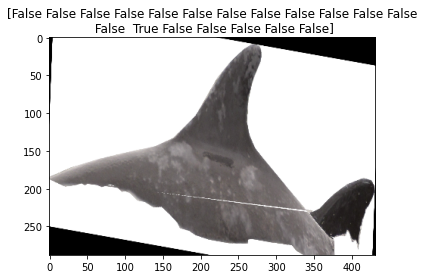

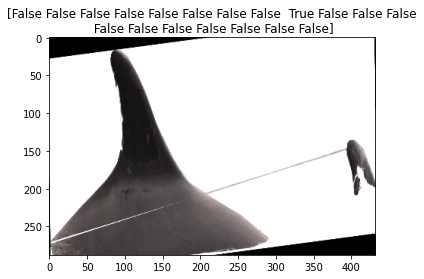

In [ ]:
for image, label in labeled_ds.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy())

In [ ]:
# split dataset
train_size = int(0.8 * image_count)
val_size = int(0.10 * image_count)
test_size = int(0.10 * image_count)

full_dataset = labeled_ds.shuffle(1000)
train_dataset = full_dataset.take(train_size)
remaining = full_dataset.skip(train_size)
raw_validation = remaining.skip(test_size)
raw_test = remaining.take(test_size)

In [ ]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_WIDTH, IMG_HEIGHT))
  return image, label

In [ ]:
train = train_dataset.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

In [ ]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [ ]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([32, 288, 432, 3])

In [ ]:
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 12, 2048)


In [ ]:
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 288, 432, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 143, 215, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 143, 215, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 143, 215, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [ ]:
#prediction_layer = tf.keras.layers.Dense(34)
from tensorflow.keras import layers
from tensorflow.keras import regularizers

prediction_layer = tf.keras.layers.Dense(classes_len)
reg_layer = tf.keras.layers.Dense(2048, kernel_regularizer=regularizers.l2(0.0001), 
                                  input_shape=IMG_SHAPE, activation='relu')

(32, 19)


In [ ]:
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)
reg_batch = reg_layer(feature_batch_average)

In [ ]:
model = tf.keras.Sequential([                       
  base_model,
  global_average_layer,
  reg_layer,
  layers.Dropout(0.5),
  reg_layer,
  layers.Dropout(0.5),
  reg_layer,
  layers.Dropout(0.5),
  reg_layer,
  layers.Dropout(0.5),
  prediction_layer
])

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 7, 12, 2048)       21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0

In [ ]:
len(model.trainable_variables)

4

In [ ]:
validation_batches = validation.repeat().batch(BATCH_SIZE)

initial_epochs = 20
validation_steps=4

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

4/4 [==============================] - 34s 8s/step - loss: 3.1458 - accuracy: 0.0781


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 3.15
initial accuracy: 0.08


In [ ]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches,
                    validation_steps=validation_steps)

Epoch 1/20
26/26 [==============================] - 165s 6s/step - loss: 3.1408 - accuracy: 0.0773 - val_loss: 3.0534 - val_accuracy: 0.0938
Epoch 2/20
26/26 [==============================] - 166s 6s/step - loss: 3.0753 - accuracy: 0.0978 - val_loss: 3.0111 - val_accuracy: 0.1484
Epoch 3/20
26/26 [==============================] - 162s 6s/step - loss: 3.0643 - accuracy: 0.1063 - val_loss: 3.0029 - val_accuracy: 0.1016
Epoch 4/20
26/26 [==============================] - 154s 6s/step - loss: 3.0350 - accuracy: 0.0870 - val_loss: 3.0358 - val_accuracy: 0.1172
Epoch 5/20
26/26 [==============================] - 154s 6s/step - loss: 3.0246 - accuracy: 0.1051 - val_loss: 3.0152 - val_accuracy: 0.1953
Epoch 6/20
26/26 [==============================] - 156s 6s/step - loss: 3.0074 - accuracy: 0.1159 - val_loss: 2.9993 - val_accuracy: 0.1328
Epoch 7/20
26/26 [==============================] - 154s 6s/step - loss: 3.0029 - accuracy: 0.1196 - val_loss: 3.0182 - val_accuracy: 0.1406
Epoch 8/20
26

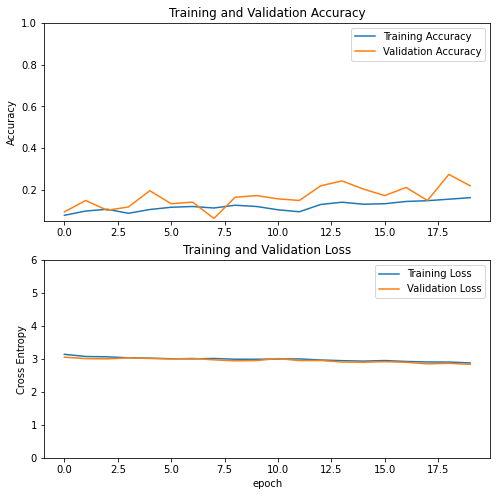

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,6.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 200

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  311


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 7, 12, 2048)       21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0

In [ ]:
len(model.trainable_variables)

70

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch =  history.epoch[-1],
                         validation_data=validation_batches,
                         validation_steps=validation_steps)

Epoch 20/30
26/26 [==============================] - 239s 9s/step - loss: 2.9670 - accuracy: 0.1147 - val_loss: 2.7917 - val_accuracy: 0.1406
Epoch 21/30
26/26 [==============================] - 235s 9s/step - loss: 2.7634 - accuracy: 0.1606 - val_loss: 2.6997 - val_accuracy: 0.1641
Epoch 22/30
26/26 [==============================] - 239s 9s/step - loss: 2.5931 - accuracy: 0.2343 - val_loss: 2.6763 - val_accuracy: 0.2656
Epoch 23/30
26/26 [==============================] - 235s 9s/step - loss: 2.4290 - accuracy: 0.2572 - val_loss: 2.4378 - val_accuracy: 0.2891
Epoch 24/30
26/26 [==============================] - 242s 9s/step - loss: 2.1756 - accuracy: 0.3418 - val_loss: 2.4615 - val_accuracy: 0.2891
Epoch 25/30
26/26 [==============================] - 239s 9s/step - loss: 2.0442 - accuracy: 0.3937 - val_loss: 2.7600 - val_accuracy: 0.3047
Epoch 26/30
26/26 [==============================] - 242s 9s/step - loss: 1.9016 - accuracy: 0.4203 - val_loss: 1.9547 - val_accuracy: 0.4453
Epoch 

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

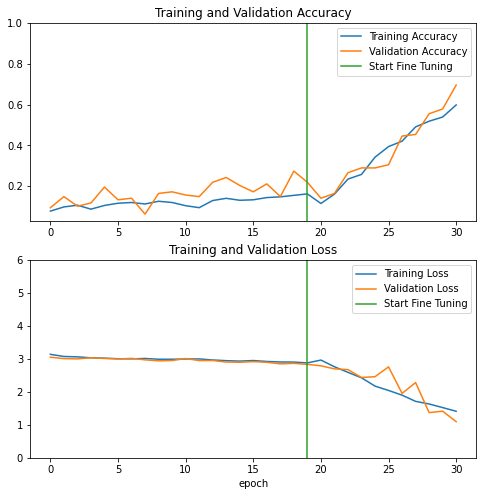

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')



plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 6.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()